In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

In [144]:

df_cust = pd.read_csv(r"customers.csv")

## Data Exploration

In [145]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [146]:
df_cust.sample(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2297,466816,Male,Yes,82,Yes,Lawyer,0.0,High,2.0,Cat_6
134,459405,Female,Yes,78,No,Doctor,1.0,High,2.0,Cat_6
2287,466799,Female,No,21,No,Healthcare,2.0,Low,3.0,Cat_6
1346,463503,Male,Yes,25,Yes,Entertainment,0.0,Low,2.0,Cat_7
2264,466732,Female,Yes,49,Yes,Engineer,0.0,High,2.0,Cat_4


In [147]:
df_cust.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


#### A small gender analysis

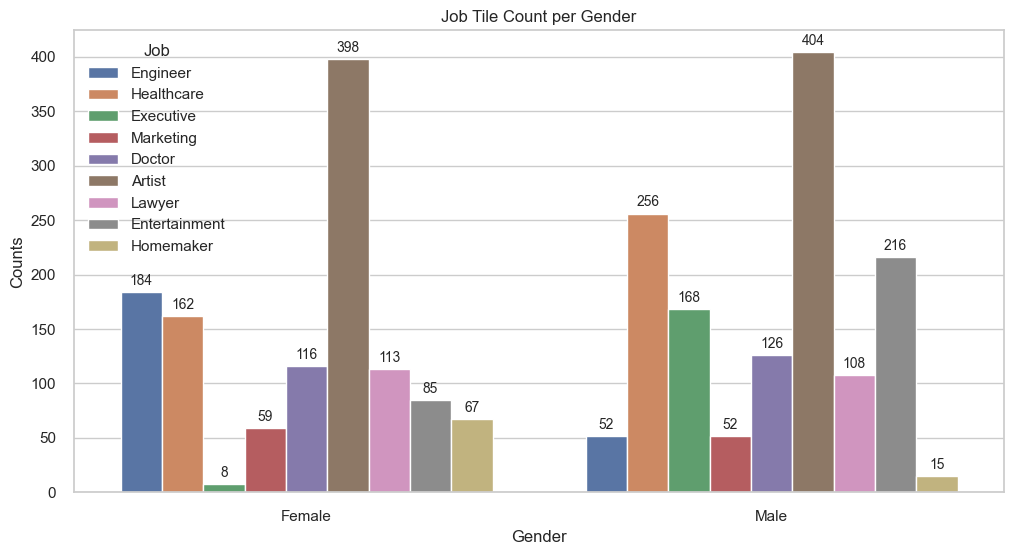

In [150]:

## Plotting the number of jobs per gender
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_cust, x='Gender', hue='Profession')


counts = df_cust.groupby(['Gender', 'Profession']).size().reset_index(name='Counts')
## Adding annotations above the bars showing the exact counts
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)

plt.title('Job Tile Count per Gender')
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.legend(title='Job')

plt.show()


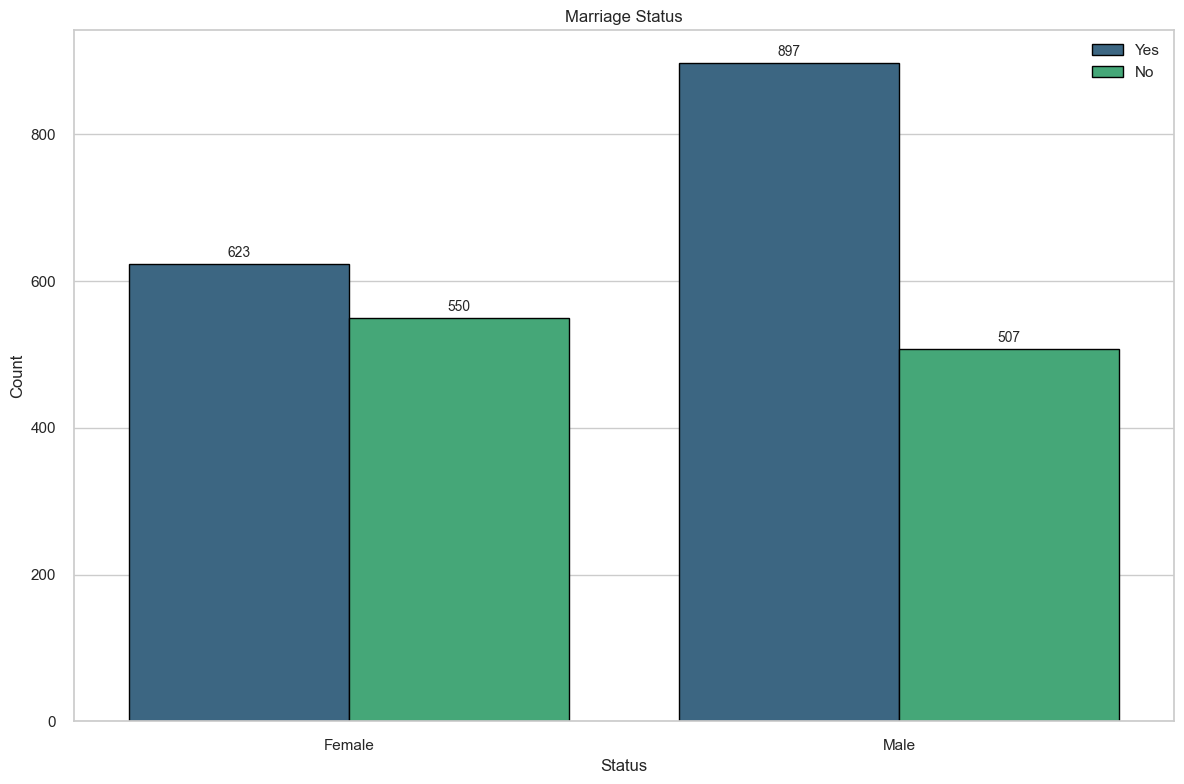

In [151]:

## Plotting the marriage status per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))  # Set the size of the figure (width=8 inches, height=6 inches)
ax1 = sns.countplot(x='Gender', hue='Ever_Married', data=df_cust, palette='viridis', edgecolor='black')
## Adding annotations above the bars showing the exact counts
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', fontsize=10, padding=3)


plt.title('Marriage Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend()
plt.title('Marriage Status')
plt.tight_layout() 

plt.show()


## 2. Data Cleaning

In [ ]:
## checking for null values
df_cust.isnull().sum()

In [ ]:
## Checking for duplicate values
df_cust.duplicated().sum()

In [ ]:


## Calculating the percentage of null values for each column and rounding to 2 decimals
null_percentages = (df_cust.isna().sum() / len(df_cust) * 100).round(2)

## Print the rounded percentages
print(null_percentages)


In [ ]:
## Since the percentage of null values is low, we drop them
df_cust.dropna(inplace=True)

In [ ]:
## Ensuring there are no more null values
df_cust.isnull().sum()

In [152]:
## Dropping the Var_1 column since it does not appear to have any statistical significance
df_cust.drop('Var_1', axis=1, inplace=True)

### Data Preprocessing

In [ ]:
## Checking out unique values by iterating every categorical column 
cat_cols = ["Gender","Ever_Married","Graduated","Profession","Spending_Score"]
for col in cat_cols:
    print(col,df_cust[col].unique())

In [ ]:
## Label encoding categorical values to be fed to the model
encoder = LabelEncoder()
for col in cat_cols:
    df_cust[col+"_en"] = encoder.fit_transform(df_cust[col])
df_cust.drop(cat_cols,axis='columns',inplace=True)
df_cust.head()

In [ ]:
## Normalising ages to bring them closer to the label-encoding values
scaler = MinMaxScaler()
df_cust['Age'] = scaler.fit_transform(df_cust[['Age']])

In [ ]:
## Checking the data preprocessing results
df_cust.head()

## Clustering

In [138]:
## Initializing a within cluster sum of squares objest to determine the optimanl cluster numbers
WCSS = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init="k-means++",random_state=42)
    km.fit(df_cust)
    WCSS.append(km.inertia_)
print(WCSS)

c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

[14458933608.99092, 3609306189.1849275, 1664945093.3157954, 917890396.6805878, 581659784.339544, 411304110.48387897, 298509496.1798262, 227898252.47940147, 177889511.55474168, 140646563.5275028]


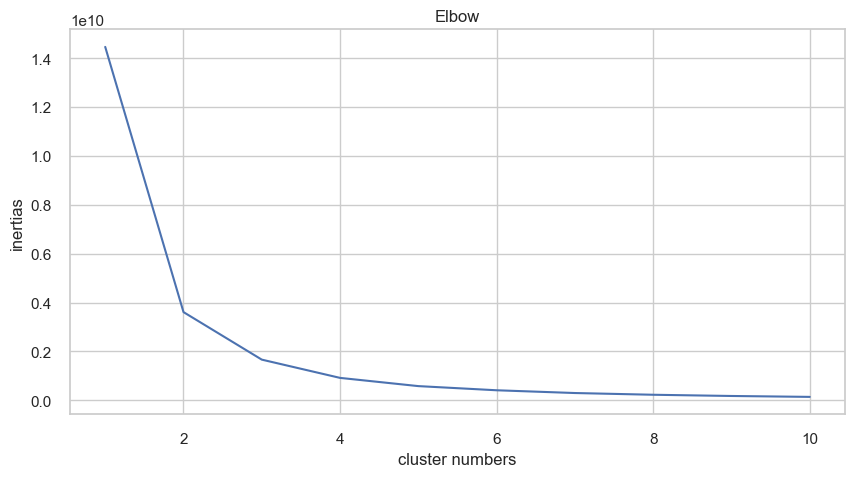

In [139]:
## Plotting the K-elbow score to determine the 'elbow' point 
plt.figure(figsize=(10,5))
plt.plot(range(1,11),WCSS)
plt.title("Elbow")
plt.xlabel("cluster numbers")
plt.ylabel("inertias")
plt.show()

c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

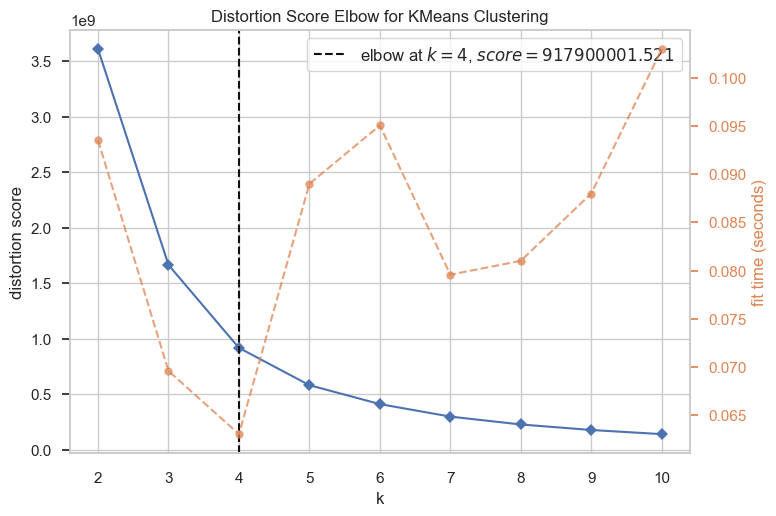

In [140]:
## Calculating and plotting the distortion score of the K-Elbow
ev = KElbowVisualizer(KMeans())
ev.fit(df_cust)
ev.show()
plt.show()

In [141]:
## Based on the result of the distortion score, it is not meaningful to assign more than 4 clusters
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
df_cust['Cluster'] = kmeans.fit_predict(df_cust)

c:\Users\argli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


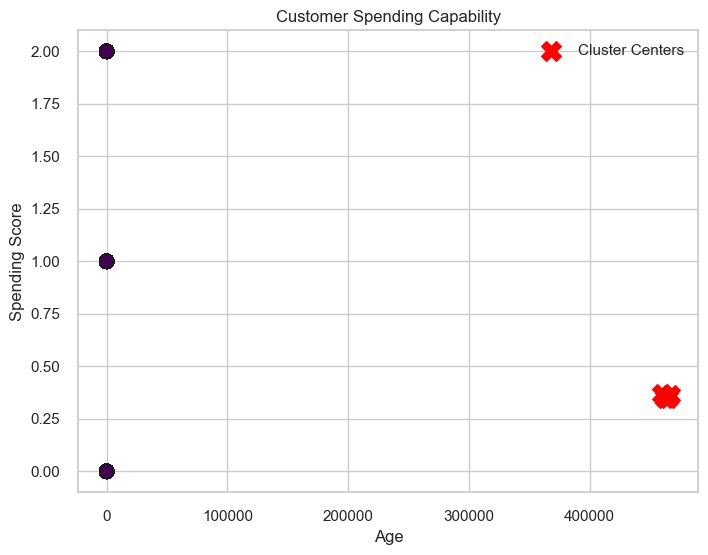

In [142]:
## Plotting the cluster results
plt.figure(figsize=(8, 6))
plt.scatter(df_cust['Age'], df_cust['Spending_Score_en'], c=df_cust['Cluster'], cmap='viridis', edgecolor='k', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Spending Capability')
plt.legend()
plt.show()